<a href="https://colab.research.google.com/github/thoufiqz55/LogisticRegression/blob/main/KNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ortho_knnnb.csv')

In [4]:
df.head()

pelvic_incidence  pelvic_tilt numeric  ...  degree_spondylolisthesis     class
0         63.027817            22.552586  ...                 -0.254400  Abnormal
1         39.056951            10.060991  ...                  4.564259  Abnormal
2         68.832021            22.218482  ...                 -3.530317  Abnormal
3         69.297008            24.652878  ...                 11.211523  Abnormal
4         49.712859             9.652075  ...                  7.918501  Abnormal

[5 rows x 7 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [7]:
df.shape

(310, 7)

In [8]:
df.describe()

pelvic_incidence  ...  degree_spondylolisthesis
count        310.000000  ...                310.000000
mean          60.496653  ...                 26.296694
std           17.236520  ...                 37.559027
min           26.147921  ...                -11.058179
25%           46.430294  ...                  1.603727
50%           58.691038  ...                 11.767934
75%           72.877696  ...                 41.287352
max          129.834041  ...                418.543082

[8 rows x 6 columns]

In [9]:
df.corr()

pelvic_incidence  ...  degree_spondylolisthesis
pelvic_incidence                  1.000000  ...                  0.638743
pelvic_tilt numeric               0.629199  ...                  0.397862
lumbar_lordosis_angle             0.717282  ...                  0.533667
sacral_slope                      0.814960  ...                  0.523557
pelvic_radius                    -0.247467  ...                 -0.026065
degree_spondylolisthesis          0.638743  ...                  1.000000

[6 rows x 6 columns]

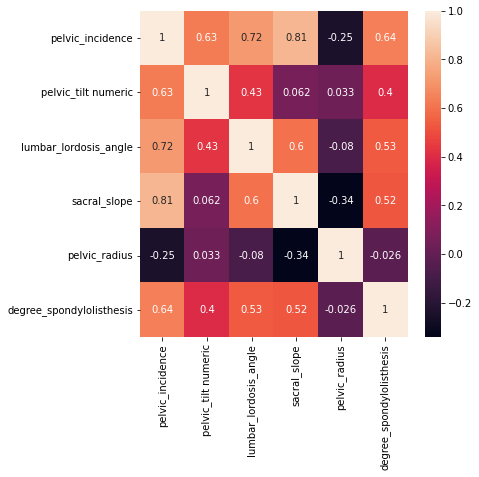

In [10]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

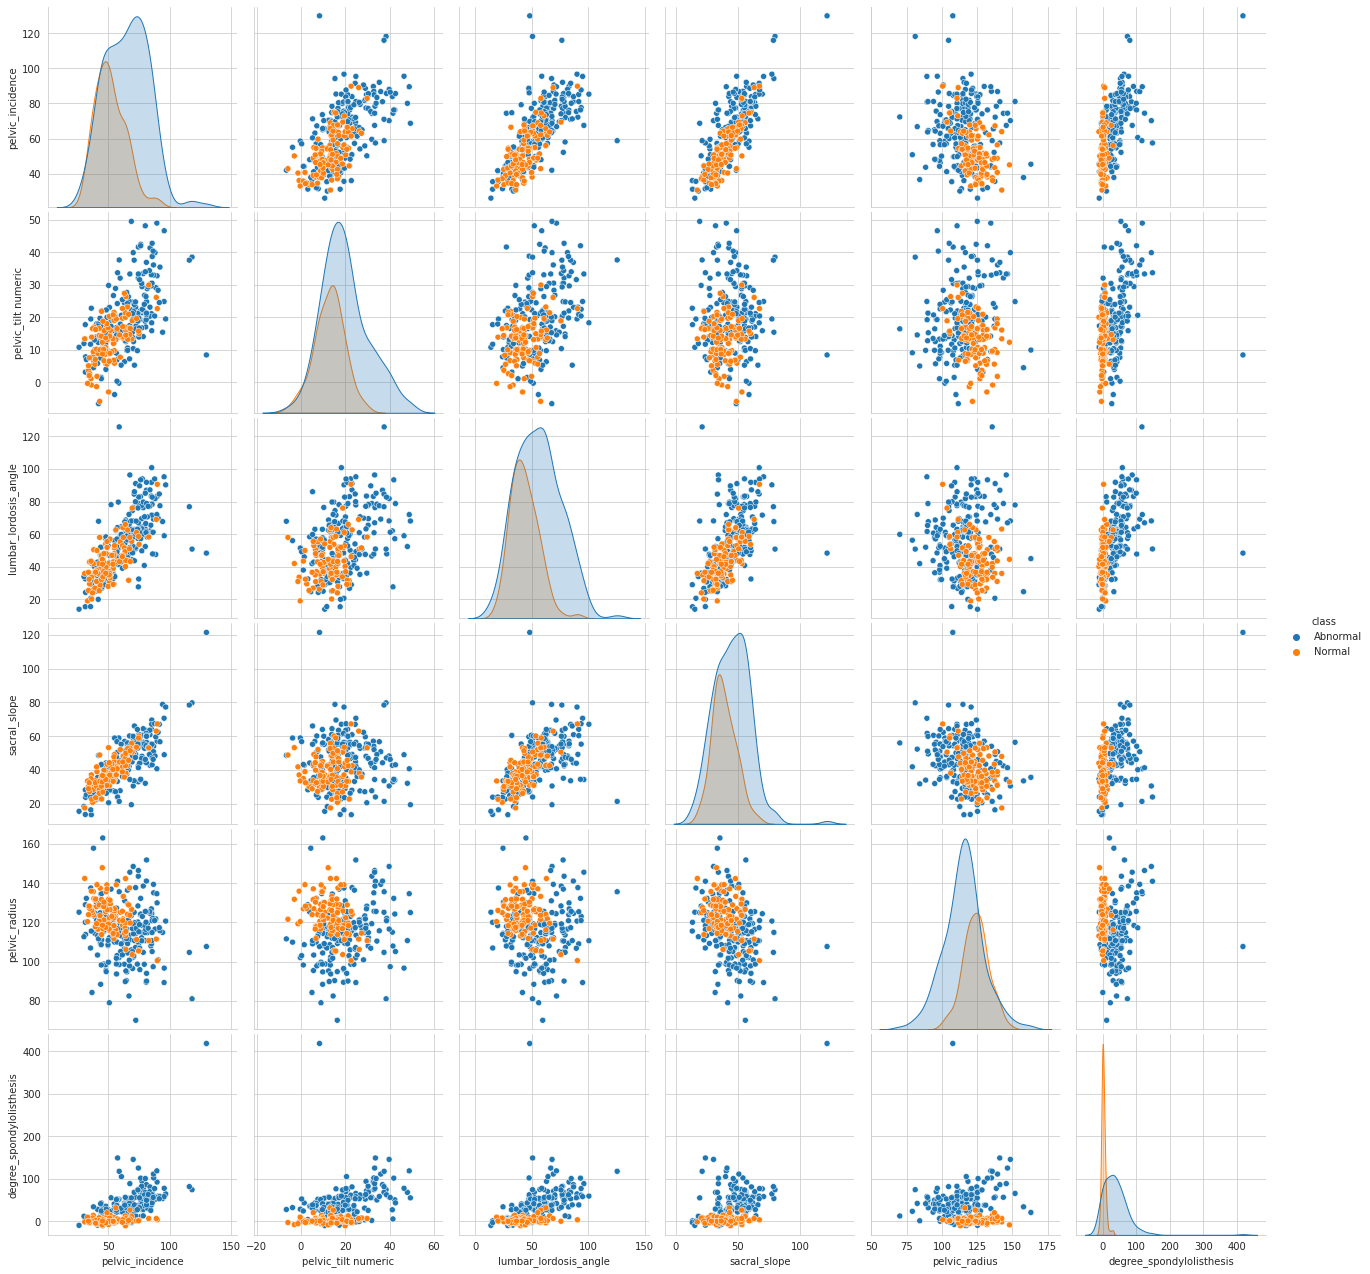

In [12]:
sns.set_style('whitegrid');
sns.pairplot(df, hue='class', size=3);
plt.show()

In [13]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [14]:
df['symptom_class']=df['class'].replace({'Abnormal':1,'Normal':0})

In [18]:
df['symptom_class']

0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: symptom_class, Length: 310, dtype: int64

In [19]:
df.drop('class',axis=1,inplace=True)

In [20]:
df.head()

pelvic_incidence  ...  symptom_class
0         63.027817  ...              1
1         39.056951  ...              1
2         68.832021  ...              1
3         69.297008  ...              1
4         49.712859  ...              1

[5 rows x 7 columns]

In [21]:
df.symptom_class.value_counts()

1    210
0    100
Name: symptom_class, dtype: int64

In [23]:
x = df.drop('symptom_class',axis=1)
y = df['symptom_class']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 42)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_acc = []
value_k = []
for k in range(1, 20):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_pred=knn.predict(x_train)
  train_score=accuracy_score(train_pred, y_train)
  test_pred=knn.predict(x_test)
  test_score=accuracy_score(y_test,test_pred)*100
  test_acc.append(test_score)
  value_k.append(k)
  print("Test Accuracy:", test_score, "value of K:",k)


Test Accuracy: 82.05128205128204 value of K: 1
Test Accuracy: 78.2051282051282 value of K: 2
Test Accuracy: 82.05128205128204 value of K: 3
Test Accuracy: 84.61538461538461 value of K: 4
Test Accuracy: 76.92307692307693 value of K: 5
Test Accuracy: 82.05128205128204 value of K: 6
Test Accuracy: 78.2051282051282 value of K: 7
Test Accuracy: 79.48717948717949 value of K: 8
Test Accuracy: 79.48717948717949 value of K: 9
Test Accuracy: 80.76923076923077 value of K: 10
Test Accuracy: 79.48717948717949 value of K: 11
Test Accuracy: 79.48717948717949 value of K: 12
Test Accuracy: 80.76923076923077 value of K: 13
Test Accuracy: 78.2051282051282 value of K: 14
Test Accuracy: 78.2051282051282 value of K: 15
Test Accuracy: 79.48717948717949 value of K: 16
Test Accuracy: 78.2051282051282 value of K: 17
Test Accuracy: 82.05128205128204 value of K: 18
Test Accuracy: 80.76923076923077 value of K: 19


In [27]:
print('Best accuracy is found {} when k is {}'.format(max(test_acc),value_k[test_acc.index(max(test_acc))]))


Best accuracy is found 84.61538461538461 when k is 4


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.61      0.81      0.69        21
           1       0.92      0.81      0.86        57

    accuracy                           0.81        78
   macro avg       0.76      0.81      0.78        78
weighted avg       0.84      0.81      0.82        78



In [29]:
print(confusion_matrix(y_test,test_pred))


[[17  4]
 [11 46]]


In [30]:
from sklearn.naive_bayes import GaussianNB
nv=GaussianNB()
nv.fit(x_train,y_train)
pred=nv.predict(x_test)

In [31]:
print('Accuracy score :',accuracy_score(y_test,pred)*100)


Accuracy score : 79.48717948717949


In [32]:
print(confusion_matrix(y_test,pred))


[[19  2]
 [14 43]]
